# Ford GoBike System Data Exploration

## by Morufdeen Olatunbosun Atilola

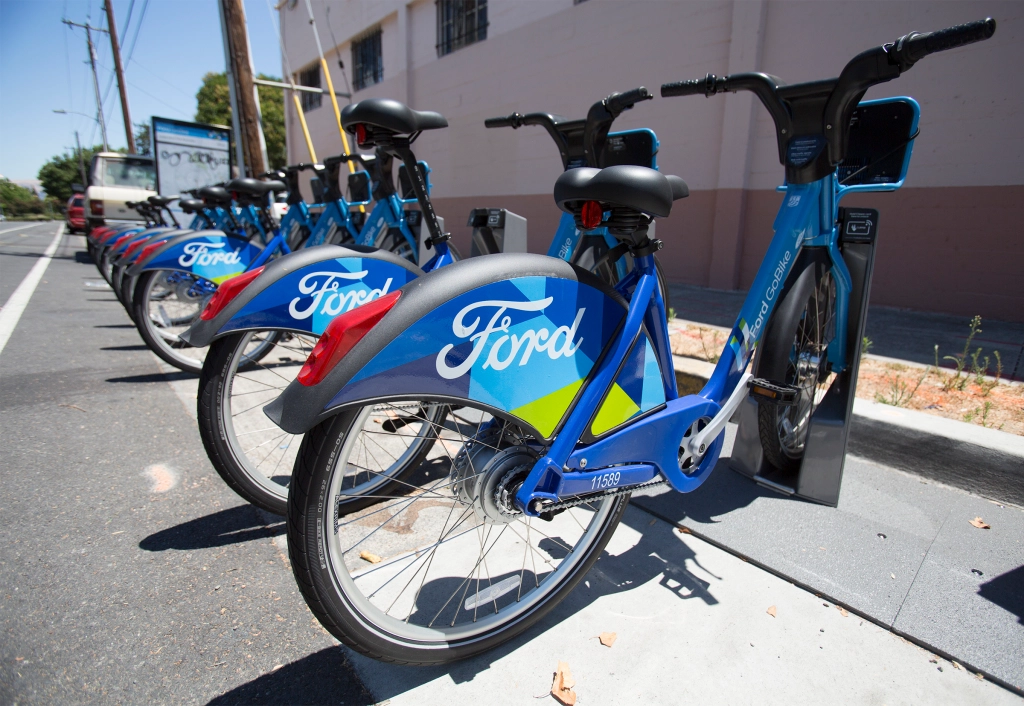

## Introduction

This dataset includes information about individual rides made in a bike-sharing system covering the greater **San Francisco Bay area**. The data contains **183,412 rides** with **16 variables** which includes: Ride duration (Secs), Start and end time, start and end station id and Name, start and end station Latitutude and Longitude, Bike Id, User type, member birth year, Member gender, Bike share for all trip (Yes or No)

## Preliminary Wrangling

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
# load in the dataset into a pandas dataframe and set option to display all data in full
pd.set_option("display.max_colwidth",100)
fordgobike = pd.read_csv('Ford_Gobike.csv')
print('The shape of the dataset is:', fordgobike.shape)
fordgobike.head()

The shape of the dataset is: (183412, 16)


,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [3]:
# The general information of each of te variables including their data type and the amount of null data
fordgobike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
duration_sec               183412 non-null int64
start_time                 183412 non-null object
end_time                   183412 non-null object
start_station_id           183215 non-null float64
start_station_name         183215 non-null object
start_station_latitude     183412 non-null float64
start_station_longitude    183412 non-null float64
end_station_id             183215 non-null float64
end_station_name           183215 non-null object
end_station_latitude       183412 non-null float64
end_station_longitude      183412 non-null float64
bike_id                    183412 non-null int64
user_type                  183412 non-null object
member_birth_year          175147 non-null float64
member_gender              175147 non-null object
bike_share_for_all_trip    183412 non-null object
dtypes: float64(7), int64(2), object(7)
memory usage: 22.4+ MB


> Since some of the variables has missing data and some has wrong datatype, I will drop the rows with missing data and change the datatype to the correct type

In [4]:
# Drop all the rows with missing data from the dataset using pd.dropna
fordgobike = fordgobike.dropna()

In [6]:
# Change wrong datatype to the correct datatype
# Change time to datetime, id to object and year to int
change_dtype = ['start_time', 'end_time','start_station_id', 'end_station_id', 'bike_id', 'member_birth_year']

for var in change_dtype:
    if 'time' in var:
        fordgobike[var] = pd.to_datetime(fordgobike[var])
    elif 'id' in var:
        fordgobike[var] = fordgobike[var].astype(str)
    else:
        fordgobike[var] = fordgobike[var].astype(int)

In [7]:
# Use .info() to confirm if all the changes has been made.
fordgobike.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 16 columns):
duration_sec               174952 non-null int64
start_time                 174952 non-null datetime64[ns]
end_time                   174952 non-null datetime64[ns]
start_station_id           174952 non-null object
start_station_name         174952 non-null object
start_station_latitude     174952 non-null float64
start_station_longitude    174952 non-null float64
end_station_id             174952 non-null object
end_station_name           174952 non-null object
end_station_latitude       174952 non-null float64
end_station_longitude      174952 non-null float64
bike_id                    174952 non-null object
user_type                  174952 non-null object
member_birth_year          174952 non-null int64
member_gender              174952 non-null object
bike_share_for_all_trip    174952 non-null object
dtypes: datetime64[ns](2), float64(4), int64(2), object(8)
memory usage

In [8]:
# The descriptive statistics of the numerical variables
fordgobike.describe()

,duration_sec,start_station_latitude,start_station_longitude,end_station_latitude,end_station_longitude,member_birth_year
count,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000
mean,704.002744,37.771220,-122.351760,37.771414,-122.351335,1984.803135
std,1642.204905,0.100391,0.117732,0.100295,0.117294,10.118731
min,61.000000,37.317298,-122.453704,37.317298,-122.453704,1878.000000
25%,323.000000,37.770407,-122.411901,37.770407,-122.411647,1980.000000
50%,510.000000,37.780760,-122.398279,37.781010,-122.397437,1987.000000
75%,789.000000,37.797320,-122.283093,37.797673,-122.286533,1992.000000
max,84548.000000,37.880222,-121.874119,37.880222,-121.874119,2001.000000


### What is the structure of your dataset?

There are **183412 rides** each with **16 features** (Ride duration (Secs), Start and end time, start and end station id and Name, start and end station Latitutude and Longitude, Bike Id, User type, member birth year, Member gender, Bike share for all trip (Yes or No)). 

1. Two features: Duration in seconds and Member Birth Year are of type **integer** which are discrete numerical variable
2. Two feature: Start_time and End_time are of type **datetime** variables
3. Five features: Start_ and end_station_id and _name and bike_id are **object** datatype which are seeminly irrelevant to our analysis.
4. Four features: Start_ and end_station_latitude and longitude are of type **float** which is a continuous numerical variables
5. Three features: user_type, member_gender, and bike_share_for_all_trip are type **object** of nominal categorical variables.

After performing preliminary wrangling on the data, the dataset reduced to 174952 rides with 16 features

### What is/are the main feature(s) of interest in your dataset?

1. I will focus more on knowing what determines the **duration** of the trip
2. Also, what period is most trip taken place in terms of time of the day, day of the week and month of the year  

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

From the peruse of the dataset, I believe that the distance between two points considering the **start and end station latitude and longitude** of each trip would have a significant impact on the duration. I also believe that user_type, birth_year (to determine member's age), and gender may also affect the duration of the trip.

Before I start the data exploration, I will need to carry out some transformation on some of the features. These includes:

1. Create a new column for day of the week, hour of the day, and month of the year for both start and end time.
2. Create a new column for the age of each member
3. Create a new column for the distance covered on each trip using the latitude and longitude of the start and end date.

In [9]:
fordgobike.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984,Male,No
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972,Male,No
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989,Other,No
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974,Male,Yes
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959,Male,No


In [10]:
# Create a new column for day of the week, hour of the day, and month of the year

import datetime as dt

# For the start time
fordgobike['start_day'] = fordgobike['start_time'].dt.day_name()
fordgobike['start_month'] = fordgobike['start_time'].dt.month_name()
fordgobike['start_hour'] = fordgobike['start_time'].dt.hour

# For the end time
fordgobike['end_day'] = fordgobike['end_time'].dt.day_name()
fordgobike['end_month'] = fordgobike['end_time'].dt.month_name()
fordgobike['end_hour'] = fordgobike['end_time'].dt.hour

# Since the hour column is of type int, let's convert it to object for the sake of our analysis
fordgobike['start_hour'] = fordgobike['start_hour'].astype(str)
fordgobike['end_hour'] = fordgobike['end_hour'].astype(str)


# Create a new column for age
fordgobike['age'] = 2019 - fordgobike['member_birth_year']

## Haversine formula to calculate the distance between two point with Latitude and Longitude

The formula below is gotten from a github account [github](https://github.com/DaniilSydorenko/haversine-geolocation)
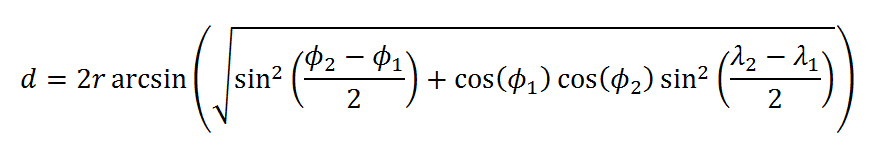

In [32]:
# Creating a column for the distance of the journey using Haversine formula given above with the start, end latitude and longitude

from math import radians, cos, sin, asin, sqrt

def distance(start_lat, end_lat, start_long, end_long):
    
    """ Convert the lat and long from degree to radian for the sake of calculation with other numerical values """
    
    start_lat, end_lat, start_long, end_long = radians(start_lat), radians(end_lat), radians(start_long), radians(end_long)
    
    # Introducing Haversine formula
    lat_diff, long_diff = end_lat - start_lat, end_long - start_long
    a = sin(lat_diff / 2)**2 + cos(start_lat) * cos(end_lat) * sin(long_diff / 2)**2
 
    distance = 2 * 6371* 1000 * asin(sqrt(a)) # 6371 is the radius of the earth and 1000 is to convert the distance to meter
    return distance

fordgobike['distance'] = fordgobike.apply(lambda row: distance(row['start_station_latitude'], row['end_station_latitude'],
                                                              row['start_station_longitude'], row['end_station_longitude']), axis =1)

In [12]:
fordgobike.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 24 columns):
duration_sec               174952 non-null int64
start_time                 174952 non-null datetime64[ns]
end_time                   174952 non-null datetime64[ns]
start_station_id           174952 non-null object
start_station_name         174952 non-null object
start_station_latitude     174952 non-null float64
start_station_longitude    174952 non-null float64
end_station_id             174952 non-null object
end_station_name           174952 non-null object
end_station_latitude       174952 non-null float64
end_station_longitude      174952 non-null float64
bike_id                    174952 non-null object
user_type                  174952 non-null object
member_birth_year          174952 non-null int64
member_gender              174952 non-null object
bike_share_for_all_trip    174952 non-null object
start_day                  174952 non-null object
start_month          

## Univariate Exploration

I will start my exploration by looking at the distribution of the main feature of interest: **Duration**

[-100, 10000, 0, 50000]

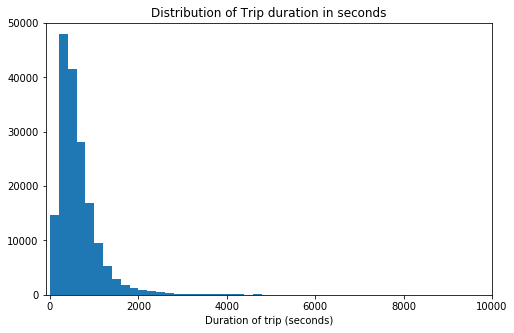

In [13]:
# start with a standard-scaled plot
binsize = 200
bins = np.arange(0, fordgobike['duration_sec'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = fordgobike, x = 'duration_sec', bins = bins)
plt.title('Distribution of Trip duration in seconds')
plt.xlabel('Duration of trip (seconds)');
plt.axis([-100, 10000, 0, 50000])

> This shows that the data is skewed to the right as there is a long tail in the distribution. lets try applying log scale to the distribution.

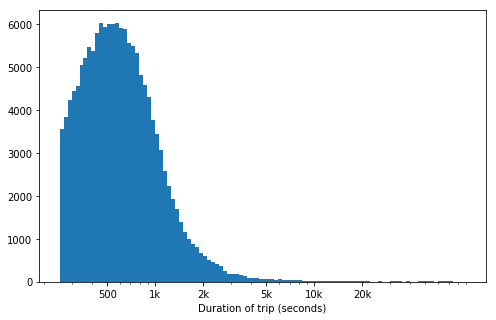

In [14]:
# So let's put it on a log scale instead
log_binsize = 0.025
bins = 10 ** np.arange(2.4, np.log10(fordgobike['duration_sec'].max())+log_binsize, log_binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = fordgobike, x = 'duration_sec', bins = bins)
plt.xscale('log')
plt.xticks([500, 1e3, 2e3, 5e3, 1e4, 2e4], [500, '1k', '2k', '5k', '10k', '20k'])
plt.xlabel('Duration of trip (seconds)');

> The duration has a long-tailed distribution skewed to the right with a lot of bike completing their trips within few seconds and few bike using longer period to complete their trip. When plotted on a log scale, the duration distribution is still skewed to the right but a little bit distributed at the initial stage. It is a unimodal distribution with mode between 200 - 500 secs.

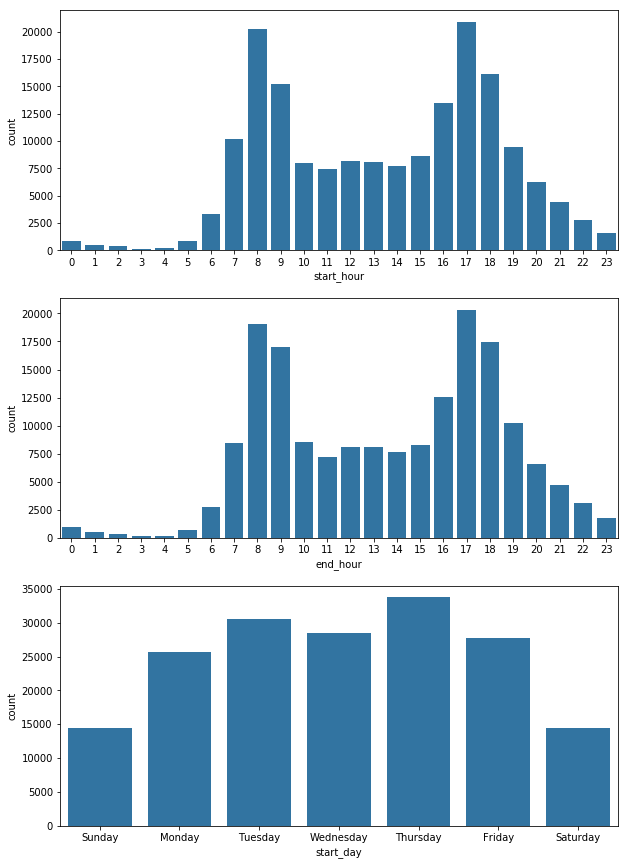

In [15]:
# Let's view the distriution of date in terms of hour of the day for start and end trip, day of the week for the start trip and month of the year

fig, ax = plt.subplots(nrows=3, figsize = [10,15])
hour = ['0','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22','23']
day = ['Sunday','Monday', 'Tuesday', 'Wednesday', 'Thursday','Friday', 'Saturday']
default_color = sb.color_palette()[0]
sb.countplot(data = fordgobike, x = 'start_hour', color = default_color, ax = ax[0], order = hour)
sb.countplot(data = fordgobike, x = 'end_hour', color = default_color, ax = ax[1], order = hour)
sb.countplot(data = fordgobike, x = 'start_day', color = default_color, ax = ax[2], order = day)

> From the visualization above, we found out that majority of the rides started in the morning around 8am and evening around 5pm. From this, we can say that, they are many riders available in the morning as that time is more or less like ride opening time. As for the 5pm, we can say that riders are many at this stage due to either riders are back for their second trip for the day or there are riders scheduled to resume around evening. Interestingly, most of the trip ended within the same hours as the start_trip hour. This shows that the duration of majority of the trips didn't last long as only some trips lasted for more than 1hr.

> Also, weekend Saturday and Sunday has lowest level of bike riding as compared to the weekdays

##### Exploring other features that can aid the analysis of our main features

[-500, 10000, 0, 20000]

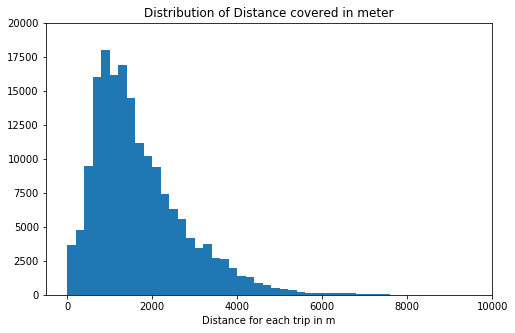

In [16]:
# Let's explore the distribution of the distance covered for each bike 
# as this is what I presumed to be the major predictor of the duration of each trip.

# Standard-scaled plot
binsize = 200
bins = np.arange(0, fordgobike['distance'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = fordgobike, x = 'distance', bins = bins)
plt.title('Distribution of Distance covered in meter')
plt.xlabel('Distance for each trip in m');
plt.axis([-500, 10000, 0, 20000])

Text(0.5,0,'Distance for each trip in m')

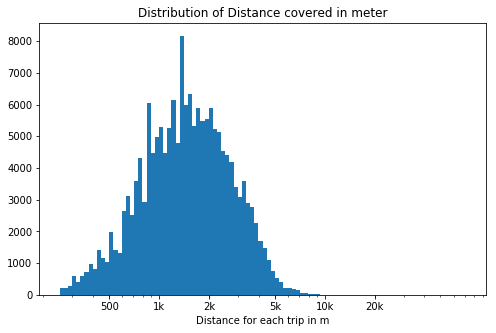

In [17]:
#Let's apply logarithm scale to the distribution

log_binsize = 0.025
bins = 10 ** np.arange(2.4, np.log10(fordgobike['distance'].max())+log_binsize, log_binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = fordgobike, x = 'distance', bins = bins)
plt.xscale('log')
plt.title('Distribution of Distance covered in meter')
plt.xticks([500, 1e3, 2e3, 5e3, 1e4, 2e4], [500, '1k', '2k', '5k', '10k', '20k'])
plt.xlabel('Distance for each trip in m')

> The distribution of the distance on a standard scale shows that it is skewed to the right with many bikes covering a very short distance which covers between 1000m to 2000m while few bikes covers a very long distance between 2000m - 7000m.
> When plotted on a log scale, the distribution is clearly shown. It confirm the interpretation of the standard plot that majority of the trips covers distance less than 2km. 

> Also, from the plot, we found out that some of the scheduled trip was not done as some bike covers 0m distance as shown from the starting point of the standard plot.

##### The distribution of other features that can be used to analyze the duration of the trip

I will try to explore **user_type, member age, gender, and bike_share_for_all_trip**

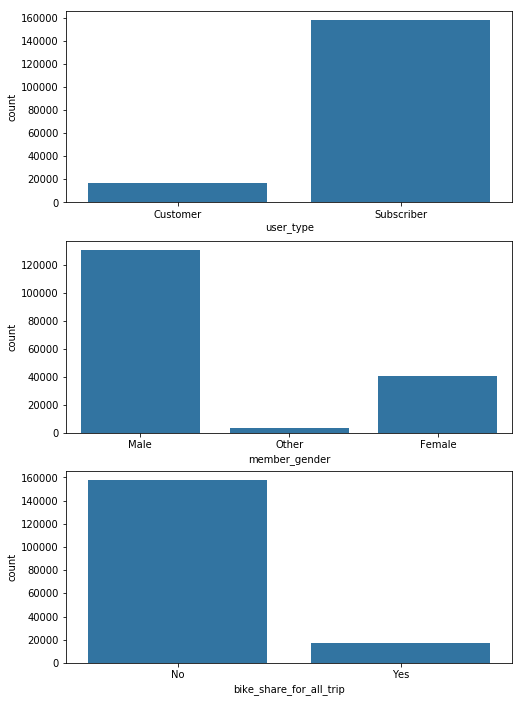

In [18]:
fig, ax = plt.subplots(nrows=3, figsize = [8,12])

default_color = sb.color_palette()[0]
sb.countplot(data = fordgobike, x = 'user_type', color = default_color, ax = ax[0])
sb.countplot(data = fordgobike, x = 'member_gender', color = default_color, ax = ax[1])
sb.countplot(data = fordgobike, x = 'bike_share_for_all_trip', color = default_color, ax = ax[2])

> The plots above shows that majority of the riders are subscriber which are more than 150,000 subscribers as against customers which are less than 20,000 riders.
> Plotting the member_gender reveal that there are extremely high number of male rider more than 130,000 male riders as against small number of female riders which is less than 50,000 female riders. Few members are neither male nor female and categorize as other gender. Additionally, only a few bike less than 20000 was shared for all trip.

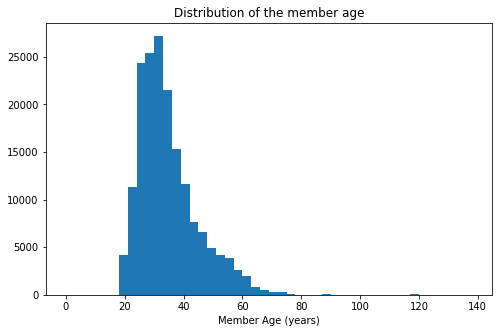

In [19]:
# Standard-scaled plot

bins = np.arange(0, fordgobike['age'].max(), 3)

plt.figure(figsize=[8, 5])
plt.hist(data = fordgobike, x = 'age', bins = bins)
plt.title('Distribution of the member age')
plt.xlabel('Member Age (years)');

> The age distribution plot is skewed to the right and it shows that majority of the riders are of age between 15 to 45 years old. Less than 200 riders are of age greater than 80 years old.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> The duration variables entails a large range of data, a standard distribution plot shows a right-skewed distribution with quite a high number of trips was covered within a short period of time in seconds and only few trips took a longer period. Under log transformation,it was seen that trip duration seeming distributed at the initial stage but later skewed to the right, with the mode found between 200 - 500 seconds. 

> Also, considering the time that most trip take place in terms of the hour of the day and day of the week, we found out that majority of the trips started in the morning around 8am and evening around 5pm. Interestingly, most of the trip ended within the same hour as the start_trip hour. Also, most of the trips is on week days [Monday - Friday] 


### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> 1. Distance: I try to calculate this from the start and end_station latitude and longitude using Havenside formula because knowing the distance would help in analyzing the main features (duration) which may not be done with the latitude and longitude available. From the investigation, I found out that some trips are scheduled (log on) without carried out which is seen from distance distribution. Also, from the log transformation, we discovered that many trips covers a short distance between 1000m to 2000m while few bikes covers a very long distance between 2km to 7km.
2.  Age: I performed transformation to the member_birth_year variables to get the age of the each member which is also a significant factor in knowing the duration of each trip.

## Bivariate Exploration

I will be exploring bivariate visualization between different variables

1. Numerical_var = [duration_sec, Distance, Age]
2. Categorical_var = [Start_hour, end_hour, Day, user_type, member_gender, bike_shared_for_all]

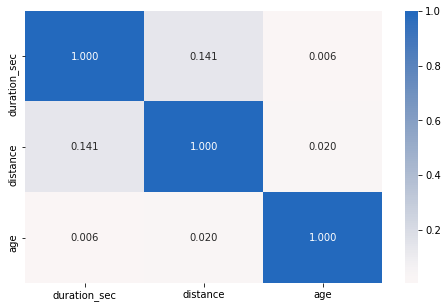

In [20]:
# Correlation plot between the numerical variables

numerical_vars = ['duration_sec', 'distance', 'age']

# correlation plot
plt.figure(figsize = [8, 5])
sb.heatmap(fordgobike[numerical_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)

> Applying correlation to the numerical variables duration_sec, distance, and age has a very weak positive correlation with each other, this may make it difficult for our analysis. Of the three variables, duration_sec and distance has the highest correlation coefficient between them.
> Further exploration of the variables may reveal some fact going forward.

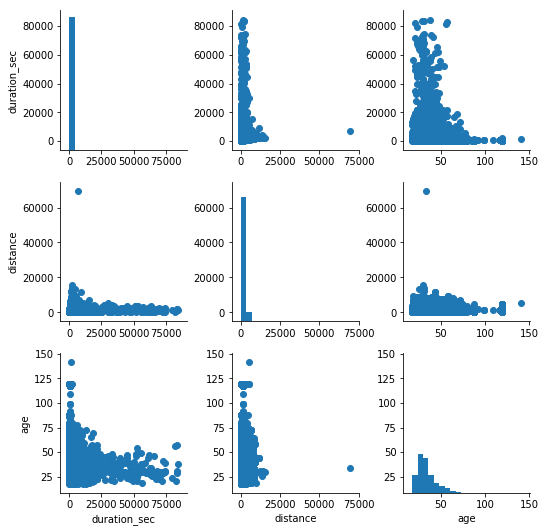

In [21]:
# plot matrix: sample 1000 trips so that plots are clearer and they render faster

fordgobike_samp = fordgobike.sample(n=1000, replace = False)
g = sb.PairGrid(data = fordgobike, vars = numerical_vars)
g = g.map_diag(plt.hist, bins = 20);
g.map_offdiag(plt.scatter)

> The scatter plot exploration of the pairwise relationship between the numerical variable reveal some insight into their low correlation
1. For duration_sec and distance, I discovered that around 98% of the trips covers distance between 0 to 20000m spread out across 0 to 75000secs.
2. For the duration_sec and age, riders of age between 20 to 60 years old covers their trips between 0 to 25000secs
3. For the age and distance, riders between the age of 20 to 70 years old covers distance between 0 to 15000m.

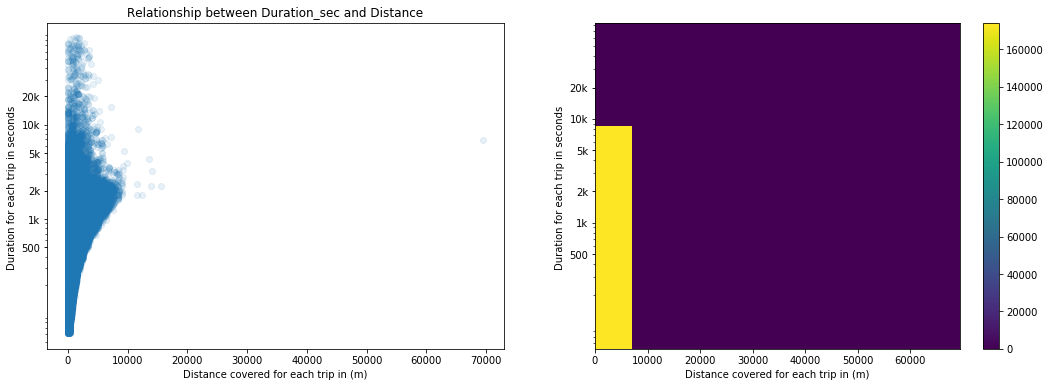

In [22]:
# Heat plot and scatter to view the relationship between duration_sec and distance

plt.figure(figsize = [18, 6])

# PLOT ON LEFT
plt.subplot(1, 2, 1)
sb.regplot(data = fordgobike, x = 'distance', y = 'duration_sec', x_jitter=0.04, scatter_kws={'alpha':1/10}, fit_reg=False)
plt.title('Relationship between Duration_sec and Distance')
plt.yscale('log')
plt.yticks([500, 1e3, 2e3, 5e3, 1e4, 2e4], [500, '1k', '2k', '5k', '10k', '20k'])
plt.xlabel('Distance covered for each trip in (m)')
plt.ylabel('Duration for each trip in seconds ');

# PLOT ON RIGHT
plt.subplot(1, 2, 2)
plt.hist2d(data = fordgobike, x = 'distance', y = 'duration_sec')
plt.yscale('log')
plt.yticks([500, 1e3, 2e3, 5e3, 1e4, 2e4], [500, '1k', '2k', '5k', '10k', '20k'])
plt.colorbar()
plt.xlabel('Distance covered for each trip in (m)')
plt.ylabel('Duration for each trip in seconds ');


> The heatmap to the right is an indication that majority of the distance covered for each trips is between 0-7km which lasted for a maximum duration of less than 8500secs. 

> To the left, the scatter plot shows that there is an outlier distance covered closed to 70km which is completed with a duration of less than 7000sec. Interestingly, we found out that many lesser distance (<70km) are completed with a duration greater than 7000secs. Although, we may want to argue that variable like speed can constitutes to the short period of time to complete the 70km trips, but we cannot assume this as it is not provided in our dataset. Therefore, we would consider it as an outline. This outlier affect the compactment of our scatter plot  

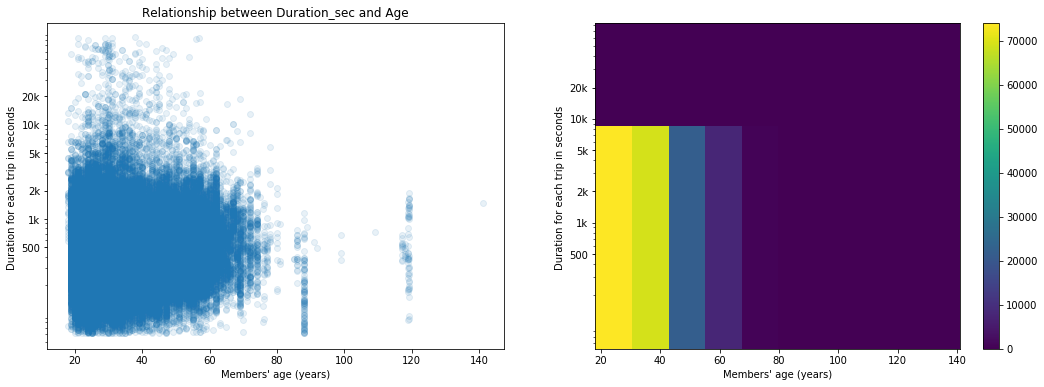

In [23]:
# Lets explore how the riders' age affect the duration of the trips using the same scatter and heat plot 

plt.figure(figsize = [18, 6])
# PLOT ON LEFT
plt.subplot(1, 2, 1)
plt.title('Relationship between Duration_sec and Age')
sb.regplot(data = fordgobike, x = 'age', y = 'duration_sec', x_jitter=0.04, scatter_kws={'alpha':1/10}, fit_reg=False)
plt.yscale('log')
plt.yticks([500, 1e3, 2e3, 5e3, 1e4, 2e4], [500, '1k', '2k', '5k', '10k', '20k'])
plt.xlabel("Members' age (years)")
plt.ylabel('Duration for each trip in seconds ');

# PLOT ON RIGHT
plt.subplot(1, 2, 2)
plt.hist2d(data = fordgobike, x = 'age', y = 'duration_sec')
plt.yscale('log')
plt.yticks([500, 1e3, 2e3, 5e3, 1e4, 2e4], [500, '1k', '2k', '5k', '10k', '20k'])
plt.colorbar()
plt.xlabel("Members' age (years)")
plt.ylabel('Duration for each trip in seconds ');

> The above graphs depicts that many of the riders are young between the age of 20 to 40 years old and they spent longer period to complete their trips. This may be due to the distance covered by the younger riders. Further exploration of these variable can reveal the relationship between them.

##### Exploration of the categorical and numerical variables

1. Numerical_var = [duration_sec, Distance, Age]
2. Categorical_var = [Start_hour, end_hour, Day, user_type, member_gender, bike_shared_for_all]

In [24]:
# compute the logarithm of duration to make plotting easier
def log_trans(x, inverse = False):
    """ quick function for computing log and power operations """
    if not inverse:
        return np.log10(x)
    else:
        return np.power(10, x)

fordgobike['log_duration'] = fordgobike['duration_sec'].apply(log_trans)

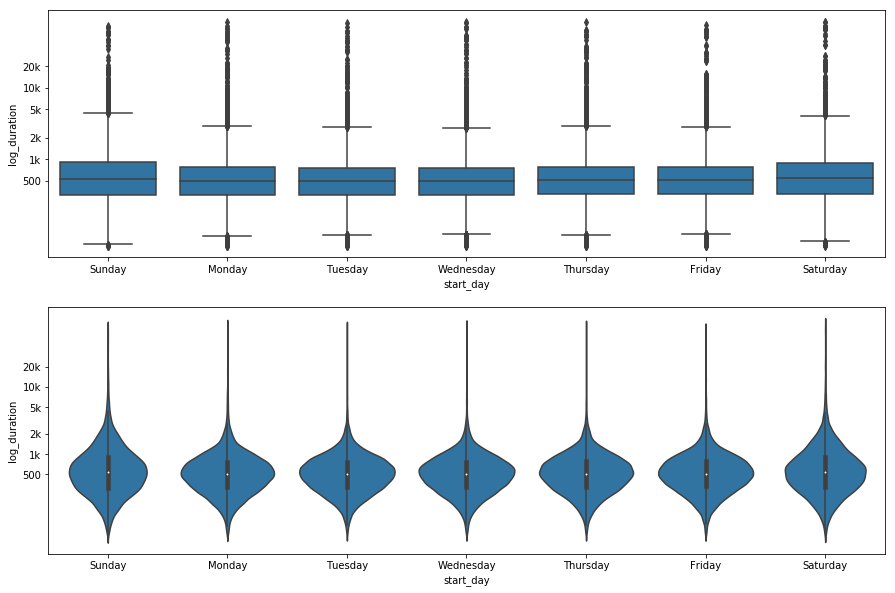

In [25]:
# Let's explore the duration_sec for each day using box plot and the violin plot

fig, ax = plt.subplots(nrows=2, figsize = [15,10])
fordgobike['log_duration'] = np.log10(fordgobike['duration_sec'])
day = ['Sunday','Monday', 'Tuesday', 'Wednesday', 'Thursday','Friday', 'Saturday']
default_color = sb.color_palette()[0]
sb.boxplot(data = fordgobike, x = 'start_day', y = 'log_duration', color = default_color, ax = ax[0], order = day)
ax[0].set_yticks(log_trans(np.array([500, 1e3, 2e3, 5e3, 1e4, 2e4])))
ax[0].set_yticklabels([500, '1k', '2k', '5k', '10k', '20k'])

sb.violinplot(data = fordgobike, x = 'start_day', y = 'log_duration', color = default_color, ax = ax[1], order = day)
ax[1].set_yticks(log_trans(np.array([500, 1e3, 2e3, 5e3, 1e4, 2e4])))
ax[1].set_yticklabels([500, '1k', '2k', '5k', '10k', '20k']);

> From the box plot, we can see that the average duration for each day are closed to around 500secs. Longer trips takes place on weekends (Saturday and Sunday) than on week days. 

> From the violinplots, it was discovered that majority of the trips carried out on weekdays were completed within 200-600 seconds

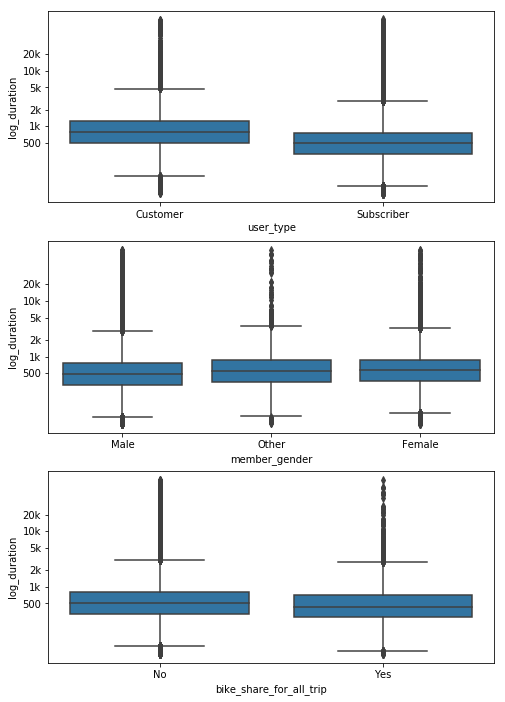

In [26]:
# Let's see if user type, gender, and bike_shared_for_all

fig, ax = plt.subplots(nrows=3, figsize = [8,12])
fordgobike['log_duration'] = np.log10(fordgobike['duration_sec'])
default_color = sb.color_palette()[0]
sb.boxplot(data = fordgobike, x = 'user_type', y = 'log_duration', color = default_color, ax = ax[0])
ax[0].set_yticks(log_trans(np.array([500, 1e3, 2e3, 5e3, 1e4, 2e4])))
ax[0].set_yticklabels([500, '1k', '2k', '5k', '10k', '20k'])

sb.boxplot(data = fordgobike, x = 'member_gender', y = 'log_duration', color = default_color, ax = ax[1])
ax[1].set_yticks(log_trans(np.array([500, 1e3, 2e3, 5e3, 1e4, 2e4])))
ax[1].set_yticklabels([500, '1k', '2k', '5k', '10k', '20k']);

sb.boxplot(data = fordgobike, x = 'bike_share_for_all_trip', y = 'log_duration', color = default_color, ax = ax[2])
ax[2].set_yticks(log_trans(np.array([500, 1e3, 2e3, 5e3, 1e4, 2e4])))
ax[2].set_yticklabels([500, '1k', '2k', '5k', '10k', '20k']);

> From the above analysis, we can see that:

1. **USER_TYPE:** Trips by customers took a longer period than the subscriber, customers' took an average of 500 to 1000secs to complete their trip whereas subscriber took lesser average duration (< 500secs) for their trips. In an earlier exploration, we discovered that the subscriber are more than 7 times the number of customer, this may also contribute to the reduction in the subscriber low average duration.
2. **MEMBER_GENDER:** Although, male riders are more than times 3 of the female riders and others, it took male riders shorter period to complete their trips as compared to the female and other counterpart. This may be as a result of different variable such as the speed of the riders (which is not provided), distance covered, and the total number of individual gender.
3. **BIKE_SHARE_FOR_ALL_TRIP:** Average duration of the shared bike is closer to the those that are not shared, although, bike not shared took a longer period in general to complete their trip  


##### Relationship between the categorical data

Categorical_var = [Start_hour, end_hour, Day, user_type, member_gender, bike_shared_for_all]

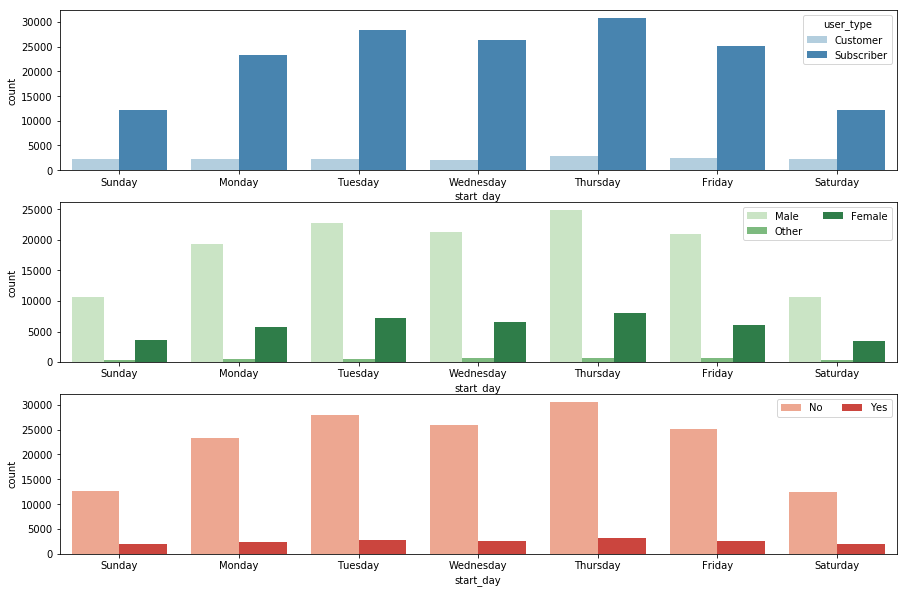

In [27]:
fig, ax = plt.subplots(nrows=2, figsize = [15,10])
day = ['Sunday','Monday', 'Tuesday', 'Wednesday', 'Thursday','Friday', 'Saturday']

# subplot 1: day vs. user_type
plt.subplot(3, 1, 1)
sb.countplot(data = fordgobike, x = 'start_day', hue = 'user_type', palette = 'Blues', order = day)

# subplot 2: day vs. member_gender
ax = plt.subplot(3, 1, 2)
sb.countplot(data = fordgobike, x = 'start_day', hue = 'member_gender', palette = 'Greens', order = day)
ax.legend(ncol = 2) # re-arrange legend to reduce overlapping

# subplot 3: day vs. bike_share_for_all_trip
ax = plt.subplot(3, 1, 3)
sb.countplot(data = fordgobike, x = 'start_day', hue = 'bike_share_for_all_trip', palette = 'Reds', order = day)
ax.legend(loc = 1, ncol = 2) # re-arrange legend to remove overlapping

> The three plots above is a confirmation that weekends (Saturday and Sunday) has smaller number of trips and Thursday has the highest number of trips. At each plot, the number of trips for each day is shared in the proportion of the total number of trips for all weeks i.e. subscribers are more than customers, male riders are more than the other two riders and more bikes are not use for all trips.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Duration has a weak correlation with the other numerical variables (Distance and Age), this is due to the fact that the distance and age are not normally distributed. One may assume that the farther the distance, the longer the duration of the trips provided that variable like speed is constant, however, more than 90% of the distance covered is between 0 to 20000m which was all completed within 0 to 75000secs. There is an outlier distance greater than 60km which was completed within a short period of time as compared to the lower distance. This may contribute to the weak correclation between the distance and duration.
Also, From the exploration of the duration and age using heat map, we discovered that younger riders of ages between 20 to 40 years spent longer duration to complete their trips, this may be due to the longer distance covered by the younger riders or the number of trips they embarked on.

> A further insight was detected when duration was explored with the categorical variable. average duration for each day are close to 500secs and longer trips takes place on weekends than week days. Quite a number of trips carried out on weekdays were completed within 200-600 secs.
When duration was explored with the user_type, we discovered that customers took a longer period to complete their trips than subscriber. It took customers an average of duration between 500-1000 secs to complete their trips as against less than 500secs average duration for the subscribers.


### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> The relationship between the age and the distance is a weak correlation which largely affected by the distrinution of both variables. The exploration shows that riders between the age of 20 to 70 years old complete trips between 0 to 15km.
> Exploring the categorical variables, we reinforced the fact that lower trips are covered on weekends than weekdays and Thursday has the highest number of trips. The number of trips for each day is associated to the ratio of the categories of each of the categorical variables. This means that subscribers are more than customers, male riders are more than the other two gender type and more bikes are not use for all trips.

## Multivariate Exploration

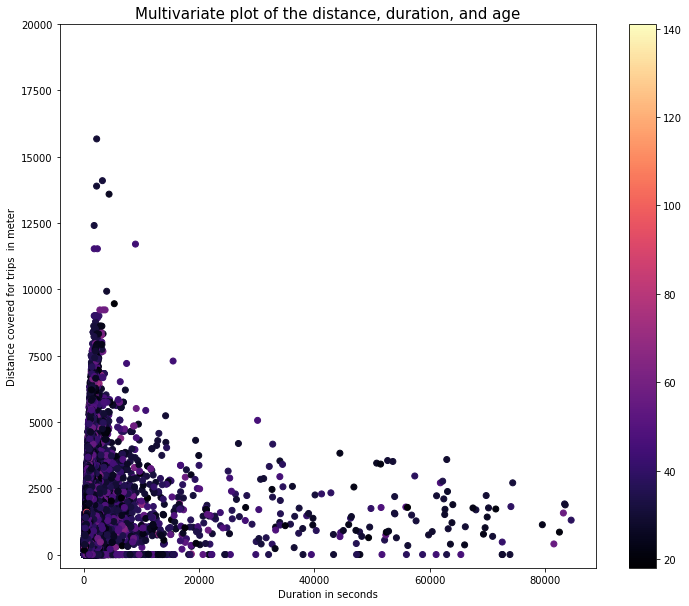

In [28]:
#Let's explore the relationship between the three numerical variables (duration, distance, age)
plt.figure(figsize = [12, 10])
plt.scatter(data = fordgobike, x = 'duration_sec', y = 'distance', c = 'age', cmap = 'magma')
plt.ylim([-500,20000])
plt.title('Multivariate plot of the distance, duration, and age', size = 15)
plt.xlabel('Duration in seconds')
plt.ylabel('Distance covered for trips  in meter')
plt.colorbar();

> From the numerical multivariate plot above, I found out that majority of the riders who completed their trips within 0 to 15000 secs to covered the distance between 0 to 5km are of the age range between 20 to 40 years old. Also, from this, we can say that the average distance covered is between 1000m to 2000m completed within a duration range of 500 to 2000 seconds.

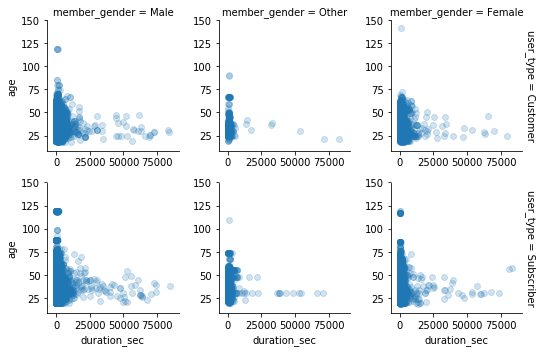

In [29]:
# Let's check the age and duration relationship in relation to the user_type and member_gender

g = sb.FacetGrid(data = fordgobike, col = 'member_gender', row = 'user_type', size = 2.5,
                margin_titles = True)
g.map(plt.scatter, 'duration_sec', 'age', alpha = 1/5)


> The above facet plot, more than 70% of the male customers are between the age of 20 to 40 years old and completed their trips within 0 to 15000secs. Similarly, the male subscribers between the age of 20 to 50 years old completed their trips within a duration less than that of the customer. Although, around 10% of the male subscriber with age between 25 to 50 years old used longer duration greater 25000 secs.

> Those other customer with unknown gender has an age range between 20 - 70 years old with an extremely short duration tilted around 0secs, which means that their trips were covered with a short period of less than 1000secs. This is almost similar for the other subscribers with no gender identity.

> For the female, it seems like female customers are more than female subscriber, although, this is a general assumption based on the above facet grid. In both cases, we found out that many females are within the age of 20 to 75years and completed their trips within a duration less than 25000secs.

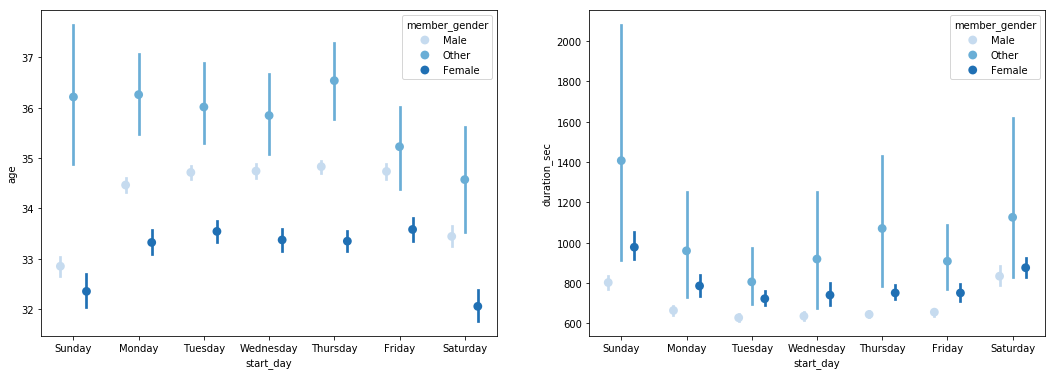

In [30]:
#Let's explore the gender that attended on each day in relation to theor age and duration

plt.figure(figsize = [18, 6])

# PLOT ON LEFT
plt.subplot(1, 2, 1)
day = ['Sunday','Monday', 'Tuesday', 'Wednesday', 'Thursday','Friday', 'Saturday']
ax = sb.pointplot(data = fordgobike, x = 'start_day', y = 'age', hue = 'member_gender',
           palette = 'Blues', linestyles = '', dodge = 0.4, order = day)
#ax.set_yticklabels([],minor = True);

# PLOT ON RIGHT
plt.subplot(1, 2, 2)
day = ['Sunday','Monday', 'Tuesday', 'Wednesday', 'Thursday','Friday', 'Saturday']
ax = sb.pointplot(data = fordgobike, x = 'start_day', y = 'duration_sec', hue = 'member_gender',
           palette = 'Blues', linestyles = '', dodge = 0.4, order = day)
ax.set_yticklabels([],minor = True);

> This pointplot gave an additional insight into our analysis. From the relationship to the left, we observed that average age across all days is such that female riders are geneerally younger than male riders which are younger than other riders. However, this arrangement is in the opposite when related to the average time spent on trips for each day. The plot shows us that, male riders with an average age younger than their female counterpart, spent lesser duration across all days to complete their trips but the other gender riders maintain their spot of using longer duration to complete their trips as can say that increase in their age affects the time spent on their trips on an average.

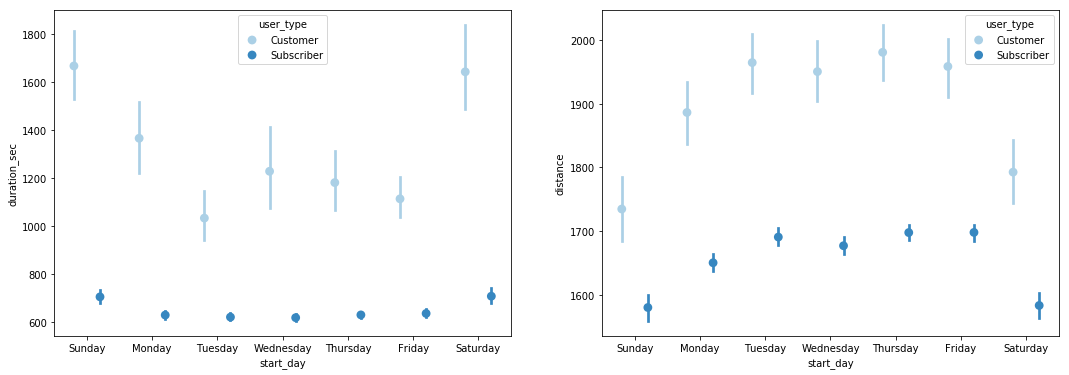

In [31]:
# Let's explore the relationship between the duration and user_type for each day 

plt.figure(figsize = [18, 6])

plt.subplot(1, 2, 1)
day = ['Sunday','Monday', 'Tuesday', 'Wednesday', 'Thursday','Friday', 'Saturday']
sb.pointplot(data = fordgobike, x = 'start_day', y = 'duration_sec', hue = 'user_type',
           palette = 'Blues', linestyles = '', dodge = 0.4, order = day)

plt.subplot(1, 2, 2)
day = ['Sunday','Monday', 'Tuesday', 'Wednesday', 'Thursday','Friday', 'Saturday']
sb.pointplot(data = fordgobike, x = 'start_day', y = 'distance', hue = 'user_type',
           palette = 'Blues', linestyles = '', dodge = 0.4, order = day)

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> In this section, I plotted a multivariate visualization of the three numerical variables (duration, distance, and age). From the analysis, I discovered that majority of the riders are within the age of 20-40 years and they completed their trips of distance between 0 to 5km within the period of 0 to 15000 secs. We also found out that average distance covered is between 1000 to 2000m and was completed within 500 to 2000 secs.

> Similarly, I dive deep to perform four variables visualization between two numerical (duration and age) and categorical variables (user_type and member_gender) where I found out that more than 70% of the male customer are between the age of 20 to 50 years old and completed their trips within 0 to 15000secs which is longer than the male subscriber. Although, around 10% of the male subscriber whose age range is between 25 to 50 years old completed their trips with a duration longer than 25000 secs. Also, the unknown gender user has a duration which is tilted around 0 secs which could reinforce the discovery earlier mentioned that some user didn't embark on theor trips. The female customer is more than the female subscribers many of which are within the age range of 20 to 75 years old and completed their trips with a duration less than 25000secs.

> Lastly, the multivariate pointplot shows that on average, female riders are younger than male riders but the male riders completed their trips faster than the female riders. As regards the riders with an unknown gender identity, their average age ranked in-between male and female likewise their average duration.


### Were there any interesting or surprising interactions between features?

> Interestingly, with the help of a pointplot, it was noticed that subscribers completed their trips within a very short period (less than 800 secs) on an average shorter than the customer users. This may be largely affected by the average distance covered by the customers that is higher than the subscriber.

## Conclusions

> I explore the dataset of the bike-sharing system called **FordGoBike**. In this exploration, my main feature is the duration variable and other useful variables are birth_year, user_type, member_gender. To be able to perform my analysis, I performed a preliminary data wrangling of the dataset where I created two variables distance and age from the existing variables.

> Exploring the dataset, I used univariate, bivariate, and multivariate visulaization for the analysis. From the analysis, below are some of the findings as related to the main features:
> 1. The duration dataset is not normally distributed as it is skewed to the right with quite a number of trips were completed within a short period of time.
2. Majority of the trips started in the morning around 8am and evening around 5pm and most of the trips are done on weekdays (Monday to Friday)
3. There is a weak correlation between the duration, distance, and age. this boils to the fact that these three numerical variables are not normally distributed. We may also assumed that farther trips will take longer duration provided that variables like speed are constant, but more than 90% of the distance covered is between 0 to 20000m which was all completed within 0 to 75000secs.
4. Younger riders of ages between 20 to 40 years old spent longer duration to complete their trips, this may be due to the longer distance covered by the younger riders or the number of trips they embarked on.
5. Majority of the riders are within the age of 20-40 years and they completed their trips with an average distance covered between 1000 to 2000m that was completed within 500 to 2000 secs.
6. On an average, female riders are younger than male riders but the male riders completed their trips faster than the female riders.
7. Subscribers completed their trips within a very short period (less than 800 secs) on an average shorter than the customer users.

#### Additional Insights:
> 1. The duration of the trips is dependent on the user_type (customer or subscriber)
2. Member_gender also has an impact on the duration of the trip as it was observed that male completed their trip faster than female and other gender.
3. The distance doesn't really affect the duration as variable such as speed of each trip is unknown and distance and duration are not normally distributed.
4. More trips were carried out on week days than weekends.

